<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/Primera_red_neuronal_profunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mi primera red neuronal profunda

Este cuaderno es un ejercicio de ejemplo del proceso de desarrollo de una red neuronal profunda con Keras/TensorFlow




## Cargando los datos

Para este ejemplo usaresmo CIFAR-10, una colección de 60.000 imágenes en color de 32x32 bits que representan 10 clases de objetos

In [1]:
# Librerías que vamos a utilizar
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10#


In [2]:
# Cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#Normalizamos los datos de las imágenes y one-hot-encoding de la variable objetivo
NUM_CLASES = 10
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
y_train = to_categorical(y_train, NUM_CLASES)
y_test = to_categorical(y_test, NUM_CLASES)


In [4]:
# Verificamos los tamaños de los tensores
print('Tensor de entrada de entrenamiento: ', X_train.shape)
print('Tensor de entrada de test: ', X_test.shape)
print('Tensor de salida de entrenamiento: ', y_train.shape)
print('Tensor de salida de test: ', y_test.shape)



Tensor de entrada de entrenamiento:  (50000, 32, 32, 3)
Tensor de entrada de test:  (10000, 32, 32, 3)
Tensor de salida de entrenamiento:  (50000, 10)
Tensor de salida de test:  (10000, 10)


## Construyendo el modelo
Usaremos la API funcional de Keras.

In [5]:
# Cargamos las librerías que vamos a utilizar
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [9]:
# Definimos la arquitectura de la red
input_layer = Input(shape=(32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10, activation='softmax')(x)
model = Model(input_layer, output_layer)

In [10]:
# Resumen de la red construida
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_7 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compilamos el modelo
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Entrenando el modelo

In [14]:
model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9655 - accuracy: 0.2891
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6935 - accuracy: 0.3976
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6027 - accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5398 - accuracy: 0.4566
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5136 - accuracy: 0.4582
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4638 - accuracy: 0.4797
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4311 - accuracy: 0.4919
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4125 - accuracy: 0.4989
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3793 - accuracy: 0.5118
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.365

## Evaluando el modelo

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4418 - accuracy: 0.4895


[1.4418426752090454, 0.4894999861717224]

In [16]:
CLASES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
predicciones = model.predict(X_test)
y_pred = CLASES[np.argmax(predicciones, axis=-1)]
y_real = CLASES[np.argmax(y_test, axis=-1)]

In [18]:
y_real

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

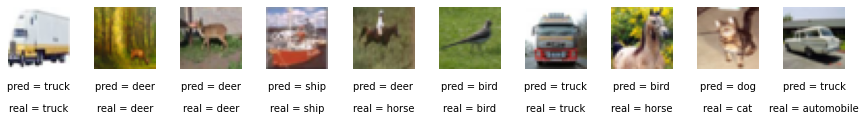

In [25]:
# Visualizando algunas prediciones
import matplotlib.pyplot as plt

n_a_mostrar = 10
indices = np.random.choice(range(len(X_test)), n_a_mostrar)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = X_test[idx]
  ax = fig.add_subplot(1, n_a_mostrar, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(y_pred[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'real = ' + str(y_real[idx]), fontsize=10,  ha='center', transform=ax.transAxes)
  ax.imshow(img)

## Mejorando la red

Usaremos redes convolucionales que tengan en consideracion la estructura espacial de la imagen.